https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

# The Basics

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In Numpy dimensions are called axes. The number of axes is rank.

For example, the coordinates of a point in 3D space [1, 2, 1] is an array of rank 1, because it has one axis. That axis has a length of 3. In example pictured below, the array has rank 2 (it is 2-dimensional). The first dimension (axis) has a length of 2, the second dimension has a length of 3.

In [1]:
[[ 1., 0., 0.],
 [ 0., 1., 2.]]

[[1.0, 0.0, 0.0], [0.0, 1.0, 2.0]]

Numpy’s array class is called *ndarray*. It is also known by the alias *array*. Note that numpy.array is not the same as the Standard Python Library class array.array, which only handles one-dimensional arrays and offers less functionality. The more important attributes of an ndarray object are:


**ndarray.ndim**
    
>the number of axes (dimensions) of the array. In the Python world, the number of dimensions is referred to as rank.


**ndarray.shape**

>the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the rank, or number of dimensions, ndim.

**ndarray.size**

>the total number of elements of the array. This is equal to the product of the elements of shape.

**ndarray.dtype**

>an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

**ndarray.itemsize**

>the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize.

**ndarray.data**

>the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities. 

## An Example

In [2]:
import numpy as np
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [3]:
a.shape

(3, 5)

In [4]:
a.ndim

2

In [5]:
a.dtype.name

'int64'

In [6]:
a.itemsize

8

In [7]:
a.size

15

In [8]:
type(a)

numpy.ndarray

In [9]:
b = np.array([6, 7, 8])
b

array([6, 7, 8])

In [10]:
type(b)

numpy.ndarray

## Array Creation



There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [68]:
import numpy as np
a = np.array([2,3,4])
a

array([2, 3, 4])

In [12]:
a.dtype

dtype('int64')

In [13]:
b = np.array([1.2, 3.5, 5.1])
b.dtype

dtype('float64')

A frequent error consists in calling array with multiple numeric arguments, rather than providing a single list of numbers as an argument.

In [14]:
a = np.array(1,2,3,4)    # WRONG

ValueError: only 2 non-keyword arguments accepted

In [ ]:
a = np.array([1,2,3,4])  # RIGHT
a

The type of the array can also be explicitly specified at creation time:

In [ ]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
c

Often, the elements of an array are originally unknown, but its size is known. Hence, NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

The function zeros creates an array full of zeros, the function ones creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64.

In [ ]:
np.zeros( (3,4) )

In [ ]:
np.ones( (2,3,4), dtype=np.int16 ) # dtype can also be specified

In [ ]:
np.empty( (2,3) ) # uninitialized, output may vary

To create sequences of numbers, NumPy provides a function analogous to range that returns arrays instead of lists

In [ ]:
np.arange( 10, 30, 5 )

In [ ]:
np.arange( 0, 2, 0.3 ) # it accepts float arguments

When arange is used with floating point arguments, it is generally not possible to predict the number of elements obtained, due to the finite floating point precision. For this reason, it is usually better to use the function linspace that receives as an argument the number of elements that we want, instead of the step:

In [ ]:
from numpy import pi
np.linspace( 0, 2, 9 ) # 9 numbers from 0 to 2

In [ ]:
x = np.linspace( 0, 2*pi, 100 ) # useful to evaluate function at lots of points
f = np.sin(x)

> **See also**

> array, zeros, zeros_like, ones, ones_like, empty, empty_like, arange, linspace, numpy.random.rand, numpy.random.randn, fromfunction, fromfile


## Printing Arrays

When you print an array, NumPy displays it in a similar way to nested lists, but with the following layout:

* the last axis is printed from left to right,
* the second-to-last is printed from top to bottom,
* the rest are also printed from top to bottom, with each slice separated from the next by an empty line.

One-dimensional arrays are then printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices.

In [ ]:
a = np.arange(6)                         # 1d array
print(a)

In [ ]:
b = np.arange(12).reshape(4,3)           # 2d array
print(b)

In [ ]:
c = np.arange(24).reshape(2,3,4)         # 3d array
print(c)

If an array is too large to be printed, NumPy automatically skips the central part of the array and only prints the corners:

In [ ]:
print(np.arange(10000))

In [ ]:
print(np.arange(10000).reshape(100,100))

To disable this behaviour and force NumPy to print the entire array, you can change the printing options using set_printoptions.

In [ ]:
# np.set_printoptions(threshold='nan')

## Basic Operations
Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [ ]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

In [ ]:
c = a-b
c

In [ ]:
b**2

In [ ]:
10*np.sin(a)

In [ ]:
a<35

Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the dot function or method:

In [ ]:
A = np.array( [[1,1],
            [0,1]] )
B = np.array( [[2,0],
            [3,4]] )

In [ ]:
A*B # elementwise product

In [ ]:
A.dot(B) # matrix product

In [ ]:
np.dot(A, B) # another matrix product

Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [ ]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))
a *= 3
a

In [ ]:
b += a
b

In [ ]:
a += b # b is not automatically converted to integer type

When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting).

In [ ]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0,pi,3)
b.dtype.name

In [ ]:
c = a+b
c

In [ ]:
c.dtype.name

In [ ]:
d = np.exp(c*1j)
d

In [ ]:
d.dtype.name

Many unary operations, such as computing the sum of all the elements in the array, are implemented as methods of the ndarray class.

In [ ]:
a = np.random.random((2,3))
a

In [ ]:
a.sum()

In [ ]:
a.min()

In [ ]:
a.max()

By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the axis parameter you can apply an operation along the specified axis of an array:

In [ ]:
b = np.arange(12).reshape(3,4)
b

In [ ]:
b.sum(axis=0) # sum of each column

In [ ]:
b.min(axis=1) # min of each row

In [ ]:
b.cumsum(axis=1) # cumulative sum along each row

## Universal Functions
NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions”(ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [ ]:
B = np.arange(3)
B

In [ ]:
np.exp(B)

In [ ]:
np.sqrt(B)

In [ ]:
C = np.array([2., -1., 4.])
np.add(B, C)

> **See also :**

> all, any, apply_along_axis, argmax, argmin, argsort, average, bincount, ceil, clip, conj, corrcoef, cov, cross, cumprod, cumsum, diff, dot, floor, inner, inv, lexsort, max, maximum, mean, median, min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, transpose, var, vdot, vectorize, where


## Indexing, Slicing and Iterating

**One-dimensional** arrays can be indexed, sliced and iterated over, much like lists and other Python sequences.

In [ ]:
a = np.arange(10)**3
a

In [ ]:
a[2]

In [ ]:
a[2:5]

In [ ]:
# equivalent to a[0:6:2] = -1000; from start to position 6, 
# exclusive, set every 2nd element to -1000
a[:6:2] = -1000
a

In [ ]:
a[ : :-1] # reversed a

In [ ]:
for i in a:
    print(i**(1/3.))

**Multidimensional arrays** can have one index per axis. These indices are given in a tuple separated by commas:

In [ ]:
def f(x,y):
    return 10*x+y

In [ ]:
b = np.fromfunction(f,(5,4),dtype=int)
b

In [ ]:
b[2,3]

In [ ]:
b[0:5, 1] # each row in the second column of b

In [ ]:
b[ : ,1] # equivalent to the previous example

In [ ]:
b[1:3, : ] # each column in the second and third row of b

When fewer indices are provided than the number of axes, the missing indices are considered complete slices:

In [ ]:
b[-1] # the last row. Equivalent to b[-1,:]

The expression within brackets in b[i] is treated as an i followed by as many instances of : as needed to represent the remaining axes. NumPy also allows you to write this using dots as ```b[i,...]```.

The **dots (...)** represent as many colons as needed to produce a complete indexing tuple. For example, if x is a rank 5 array (i.e., it has 5 axes), then

* ```x[1,2,...]```is equivalent to ```x[1,2,:,:,:]```,
* ```x[...,3]``` to ```x[:,:,:,:,3]``` and
* ```x[4,...,5,:]``` to ```x[4,:,:,5,:]```.

In [ ]:
c = np.array( [[[  0,  1,  2], # a 3D array (two stacked 2D arrays)
                [ 10, 12, 13]],
               [[100,101,102],
                [110,112,113]]])
c.shape

In [ ]:
c[1,...]
# same as c[1,:,:] or c[1]

In [ ]:
c[...,2] # same as c[:,:,2]

**Iterating** over multidimensional arrays is done with respect to the first axis:

In [ ]:
for row in b:
    print(row)

However, if one wants to perform an operation on each element in the array, one can use the flat attribute which is an iterator over all the elements of the array:

In [ ]:
for element in b.flat:
    print(element)

> **See also :**

>Indexing, Indexing (reference), newaxis, ndenumerate, indices


# Shape Manipulation

## Changing the shape of an array
An array has a shape given by the number of elements along each axis:

In [ ]:
a = np.floor(10*np.random.random((3,4)))
a

In [ ]:
a.shape

The shape of an array can be changed with various commands:

In [ ]:
a.ravel() # flatten the array

In [ ]:
a.shape = (6, 2)
a.T

The order of the elements in the array resulting from ravel() is normally “C-style”, that is, the rightmost index “changes the fastest”, so the element after a[0,0] is a[0,1]. If the array is reshaped to some other shape, again the array is treated as “C-style”. Numpy normally creates arrays stored in this order, so ravel() will usually not need to copy its argument, but if the array was made by taking slices of another array or created with unusual options, it may need to be copied. The functions ravel() and reshape() can also be instructed, using an optional argument, to use FORTRAN-style arrays, in which the leftmost index changes the fastest.

The reshape function returns its argument with a modified shape, whereas the ndarray.resize method modifies the array itself:

In [ ]:
a

In [ ]:
a.resize((2,6))
a

If a dimension is given as -1 in a reshaping operation, the other dimensions are automatically calculated:

In [ ]:
a.reshape(3,-1)

> **See also :**

> ndarray.shape, reshape, resize, ravel


## Stacking together different arrays
Several arrays can be stacked together along different axes:

In [ ]:
a = np.floor(10*np.random.random((2,2)))
a

In [ ]:
b = np.floor(10*np.random.random((2,2)))
b

In [ ]:
np.vstack((a,b))

In [ ]:
np.hstack((a,b))

The function column_stack stacks 1D arrays as columns into a 2D array. It is equivalent to vstack only for 1D arrays:

In [ ]:
from numpy import newaxis
np.column_stack((a,b))   # With 2D arrays

In [ ]:
a = np.array([4.,2.])
b = np.array([2.,8.])
a[:,newaxis]  # This allows to have a 2D columns vector

In [ ]:
np.column_stack((a[:,newaxis],b[:,newaxis]))

In [ ]:
np.vstack((a[:,newaxis],b[:,newaxis])) # The behavior of vstack is different

For arrays of with more than two dimensions, hstack stacks along their second axes, vstack stacks along their first axes, and concatenate allows for an optional arguments giving the number of the axis along which the concatenation should happen.

**Note**

In complex cases, r_ and c_ are useful for creating arrays by stacking numbers along one axis. They allow the use of range literals (”:”) :

In [ ]:
np.r_[1:4,0,4]

When used with arrays as arguments, r_ and c_ are similar to vstack and hstack in their default behavior, but allow for an optional argument giving the number of the axis along which to concatenate.

> **See also :**

> hstack, vstack, column_stack, concatenate, c_, r_


## Splitting one array into several smaller ones

Using hsplit, you can split an array along its horizontal axis, either by specifying the number of equally shaped arrays to return, or by specifying the columns after which the division should occur:

In [ ]:
a = np.floor(10*np.random.random((2,12)))
a

In [ ]:
np.hsplit(a,3)   # Split a into 3

In [ ]:
np.hsplit(a,(3,4))   # Split a after the third and the fourth column

vsplit splits along the vertical axis, and array_split allows one to specify along which axis to split.

# Copies and Views

When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not. This is often a source of confusion for beginners. There are three cases:

## No Copy at All
Simple assignments make no copy of array objects or of their data.

In [ ]:
a = np.arange(12)
b = a            # no new object is created
b is a           # a and b are two names for the same ndarray object

In [ ]:
print a.shape
b.shape = 3,4    # changes the shape of a
print a.shape

In [ ]:
def f(x):
    print(id(x))

In [ ]:
id(a) # id is a unique identifier of an object

In [ ]:
f(a)

## View or Shallow Copy
Different array objects can share the same data. The view method creates a new array object that looks at the same data.

In [ ]:
c = a.view()
c is a

In [ ]:
c.base is a # c is a view of the data owned by a

In [ ]:
c.flags.owndata

In [ ]:
c.shape = 2,6                      # a's shape doesn't change
a.shape

In [ ]:
c[0,4] = 1234                      # a's data changes
a

Slicing an array returns a view of it:

In [ ]:
s = a[ : , 1:3]  # spaces added for clarity;
                 # could also be written "s = a[:,1:3]"
s[:] = 10   # s[:] is a view of s.
            # Note the difference between s=10 and s[:]=10
a

## Deep Copy
The copy method makes a complete copy of the array and its data.

In [ ]:
d = a.copy()  # a new array object with new data is created
d is a

In [ ]:
d.base is a # d doesn't share anything with a

In [ ]:
d[0,0] = 9999
print a
print d

## Functions and Methods Overview
Here is a list of some useful NumPy functions and methods names ordered in categories. See Routines for the full list.



**Array Creation**
>arange, array, copy, empty, empty_like, eye, fromfile, fromfunction, identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r, zeros, zeros_like

**Conversions**
>ndarray.astype, atleast_1d, atleast_2d, atleast_3d, mat

**Manipulations**
>array_split, column_stack, concatenate, diagonal, dsplit, dstack, hsplit, hstack, ndarray.item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes, take, transpose, vsplit, vstack

**Questions**
>all, any, nonzero, where

**Ordering**
>argmax, argmin, argsort, max, min, ptp, searchsorted, sort

**Operations**
>choose, compress, cumprod, cumsum, inner, ndarray.fill, imag, prod, put, putmask, real, sum

**Basic Statistics**
>cov, mean, std, var

**Basic Linear Algebra**
>cross, dot, outer, linalg.svd, vdot 

# Less Basic

## Broadcasting rules
Broadcasting allows universal functions to deal in a meaningful way with inputs that do not have exactly the same shape.

The first rule of broadcasting is that if all input arrays do not have the same number of dimensions, a “1” will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions.

The second rule of broadcasting ensures that arrays with a size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is assumed to be the same along that dimension for the “broadcast” array.

After application of the broadcasting rules, the sizes of all arrays must match. More details can be found in [Broadcasting](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html).

# Fancy indexing and index tricks
NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, as we saw before, arrays can be indexed by arrays of integers and arrays of booleans.

## Indexing with Arrays of Indices

In [15]:
a = np.arange(12)**2                       # the first 12 square numbers
i = np.array( [ 1,1,3,8,5 ] )              # an array of indices
a[i]                        # the elements of a at the positions i

array([ 1,  1,  9, 64, 25])

In [16]:
j = np.array( [ [ 3, 4], [ 9, 7 ] ] )   # a bidimensional array of indices
a[j]   

array([[ 9, 16],
       [81, 49]])

When the indexed array a is multidimensional, a single array of indices refers to the first dimension of a. The following example shows this behavior by converting an image of labels into a color image using a palette.

In [17]:
palette = np.array( [ [0,0,0],                # black
                      [255,0,0],              # red
                      [0,255,0],              # green
                      [0,0,255],              # blue
                      [255,255,255] ] )       # white

# each value corresponds to a color in the palette
image = np.array( [ [ 0, 1, 2, 0 ], 
                    [ 0, 3, 4, 0 ]  ] )
palette[image]                            # the (2,4,3) color image

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

We can also give indexes for more than one dimension. The arrays of indices for each dimension must have the same shape.

In [18]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
i = np.array( [ [0,1],              # indices for the first dim of a
                [1,2] ] )
j = np.array( [ [2,1],              # indices for the second dim
                [3,3] ] )

a[i,j]                              # i and j must have equal shape

array([[ 2,  5],
       [ 7, 11]])

In [20]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

In [21]:
a[:,j]                                     # i.e., a[ : , j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

Naturally, we can put i and j in a sequence (say a list) and then do the indexing with the list.

In [22]:
l = [i,j]
a[l]                                       # equivalent to a[i,j]

array([[ 2,  5],
       [ 7, 11]])

However, we can not do this by putting i and j into an array, because this array will be interpreted as indexing the first dimension of a.

In [23]:
s = np.array( [i,j] )
a[s]                                       # not what we want

IndexError: index 3 is out of bounds for axis 0 with size 3

In [24]:
a[tuple(s)]                                # same as a[i,j]

array([[ 2,  5],
       [ 7, 11]])

Another common use of indexing with arrays is the search of the maximum value of time-dependent series :

In [25]:
time = np.linspace(20, 145, 5)                 # time scale
data = np.sin(np.arange(20)).reshape(5,4)      # 4 time-dependent series
time

array([  20.  ,   51.25,   82.5 ,  113.75,  145.  ])

In [26]:
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [27]:
ind = data.argmax(axis=0)           # index of the maxima for each series
ind

array([2, 0, 3, 1])

In [28]:
time_max = time[ ind]       # times corresponding to the maxima

In [29]:
# => data[ind[0],0], data[ind[1],1]...
data_max = data[ind, xrange(data.shape[1])] 

In [30]:
time_max

array([  82.5 ,   20.  ,  113.75,   51.25])

In [31]:
data_max

array([ 0.98935825,  0.84147098,  0.99060736,  0.6569866 ])

In [32]:
np.all(data_max == data.max(axis=0))

True

You can also use indexing with arrays as a target to assign to:

In [33]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

a[[1,3,4]] = 0
a

However, when the list of indices contains repetitions, the assignment is done several times, leaving behind the last value:

In [34]:
a = np.arange(5)
a[[0,0,2]]=[1,2,3]
a

array([2, 1, 3, 3, 4])

This is reasonable enough, but watch out if you want to use Python’s += construct, as it may not do what you expect:

In [35]:
a = np.arange(5)
a[[0,0,2]]+=1
a

array([1, 1, 3, 3, 4])

Even though 0 occurs twice in the list of indices, the 0th element is only incremented once. This is because Python requires “a+=1” to be equivalent to “a=a+1”.

## Indexing with Boolean Arrays

When we index arrays with arrays of (integer) indices we are providing the list of indices to pick. With boolean indices the approach is different; we explicitly choose which items in the array we want and which ones we don’t.

The most natural way one can think of for boolean indexing is to use boolean arrays that have the same shape as the original array:

In [36]:
a = np.arange(12).reshape(3,4)
b = a > 4
b # b is a boolean with a's shape

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [37]:
a[b]        
# 1d array with the selected elements

array([ 5,  6,  7,  8,  9, 10, 11])

This property can be very useful in assignments:

In [38]:
a[b] = 0        # All elements of 'a' higher than 4 become 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

You can look at the following example to see how to use boolean indexing to generate an image of [the Mandelbrot set](http://en.wikipedia.org/wiki/Mandelbrot_set):

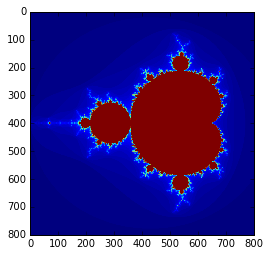

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=100 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime
plt.imshow(mandelbrot(800,800))
plt.show()

The second way of indexing with booleans is more similar to integer indexing; for each dimension of the array we give a 1D boolean array selecting the slices we want.

In [40]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])             # first dim selection
b2 = np.array([True,False,True,False])       # second dim selection

In [41]:
a[b1,:]                                   # selecting rows

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
a[:,b2]                                   # selecting columns

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [43]:
a[b1,b2]                                  # a weird thing to do

array([ 4, 10])

Note that the length of the 1D boolean array must coincide with the length of the dimension (or axis) you want to slice. In the previous example, b1 is a 1-rank array with length 3 (the number of rows in a), and b2 (of length 4) is suitable to index the 2nd rank (columns) of a.

## The ix_() function

The ix_ function can be used to combine different vectors so as to obtain the result for each n-uplet. For example, if you want to compute all the a+b*c for all the triplets taken from each of the vectors a, b and c:

In [44]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)

In [45]:
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [46]:
bx

array([[[8],
        [5],
        [4]]])

In [47]:
cx

array([[[5, 4, 6, 8, 3]]])

In [48]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [49]:
result = ax+bx*cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [50]:
result[3,2,4]
17

17

In [51]:
a[3]+b[2]*c[4]

17

You could also implement the reduce as follows:

In [52]:
def ufunc_reduce(ufct, *vectors):
   vs = np.ix_(*vectors)
   r = ufct.identity
   for v in vs:
       r = ufct(r,v)
   return r

and then use it as:

In [53]:
ufunc_reduce(np.add,a,b,c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

The advantage of this version of reduce compared to the normal ufunc.reduce is that it makes use of the Broadcasting Rules in order to avoid creating an argument array the size of the output times the number of vectors.

# Linear algebra

## Simple Array Operations

See linalg.py in numpy folder for more.

In [2]:
import numpy as np
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(a)

[[ 1.  2.]
 [ 3.  4.]]


In [3]:
a.transpose()

array([[ 1.,  3.],
       [ 2.,  4.]])

In [56]:
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [57]:
u = np.eye(2) # unit 2x2 matrix; "eye" represents "I"
u

array([[ 1.,  0.],
       [ 0.,  1.]])

In [58]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])

In [59]:
np.dot (j, j) # matrix product

array([[-1.,  0.],
       [ 0., -1.]])

In [60]:
np.trace(u)  # trace

2.0

In [61]:
y = np.array([[5.], [7.]])
np.linalg.solve(a, y)



array([[-3.],
       [ 4.]])

In [62]:
np.linalg.eig(j)

(array([ 0.+1.j,  0.-1.j]),
 array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
        [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]]))

# Tricks and Tips

## “Automatic” Reshaping
To change the dimensions of an array, you can omit one of the sizes which will then be deduced automatically:

In [63]:
a = np.arange(30)
a.shape = 2,-1,3  # -1 means "whatever is needed"
a.shape

(2, 5, 3)

In [64]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

## Vector Stacking
How do we construct a 2D array from a list of equally-sized row vectors? In MATLAB this is quite easy: if x and y are two vectors of the same length you only need do ```m=[x;y]```. In NumPy this works via the functions column_stack, dstack, hstack and vstack, depending on the dimension in which the stacking is to be done. For example:

In [65]:
x = np.arange(0,10,2)                     # x=([0,2,4,6,8])
y = np.arange(5)                          # y=([0,1,2,3,4])
m = np.vstack([x,y])                      # m=([[0,2,4,6,8],
                                          #     [0,1,2,3,4]])
xy = np.hstack([x,y])                     # xy =([0,2,4,6,8,0,1,2,3,4])

The logic behind those functions in more than two dimensions can be strange.

## Histograms
The NumPy histogram function applied to an array returns a pair of vectors: the histogram of the array and the vector of bins. Beware: matplotlib also has a function to build histograms (called hist, as in Matlab) that differs from the one in NumPy. The main difference is that pylab.hist plots the histogram automatically, while numpy.histogram only generates the data.

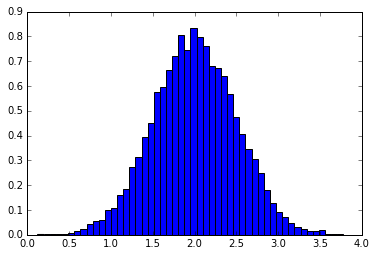

In [66]:
import numpy as np
import matplotlib.pyplot as plt
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, normed=1)       # matplotlib version (plot)
plt.show()

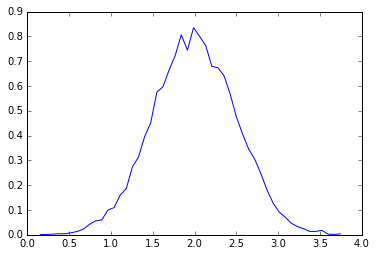

In [67]:
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, normed=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()